In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad
import pandas as pd

In [6]:
np.set_printoptions(linewidth=150)
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [7]:
PT_drive = '/Users/ash/Library/CloudStorage/OneDrive-Nexus365/PHD/arunan/Martin_google_drive'

In [9]:
df_gastros_csv = pd.read_csv(f'{PT_drive}/Gastros_helechos_complete_limpio.csv')
# df_gastros_excel = pd.read_excel(f'{PT_drive}/Gastros_helechos_complete_limpio.xlsx')
df_PF_table = pd.read_csv(f'{PT_drive}/PF_table.csv')
df_helechos_2018_2020 = pd.read_excel(f'{PT_drive}/Helechos_2018-2020.xlsx', sheet_name=None)
# Concatenate all sheets into a single DataFrame
combined = pd.concat(df_helechos_2018_2020.values(), ignore_index=True, sort=False)
combined.columns = [str(c).strip() for c in combined.columns]

# Keep only the expected columns (if present) and ensure Date is datetime
cols = ['Date', 'Month', 'Day', 'hour', 'Temp', 'RH%', 'Gastrotheca chysosticta', 'Oreobates berdemenos']
existing = [c for c in cols if c in combined.columns]
df_helechos_2018_2020 = combined[existing].copy()
df_helechos_2018_2020['Date'] = pd.to_datetime(df_helechos_2018_2020['Date'], errors='coerce')


# inspect the csvs

In [10]:
print(df_gastros_csv.head())
print(df_gastros_csv[(df_gastros_csv['call'] == 1)])

   N.Recordings     date  day  hour   Temp      HR  call  Unnamed: 7
0             1  9.01.18    1    12  7.561  91.191     0         NaN
1             2  9.01.18    1    13  6.559  98.545     0         NaN
2             3  9.01.18    1    14  5.556  99.021     0         NaN
3             4  9.01.18    1    15  4.553  98.067     0         NaN
4             5  9.01.18    1    16  4.051  99.496     0         NaN
      N.Recordings       date  day  hour    Temp       HR  call  Unnamed: 7
7                8    9.01.18    1    19   4.051  100.000     1         NaN
8                9    9.01.18    1    20   4.553  100.000     1         NaN
9               10    9.01.18    1    21   4.553  100.000     1         NaN
36              37   09.03.18    3     0   7.060   90.687     1         NaN
37              38   09.03.18    3     1   7.060   92.194     1         NaN
...            ...        ...  ...   ...     ...      ...   ...         ...
9236          9237  09.21.19   388     8   7.582   86.

In [11]:
print(df_helechos_2018_2020.head())
print(df_helechos_2018_2020[df_helechos_2018_2020['Gastrotheca chysosticta']==1])

        Date  Month    Day  hour   Temp    RH%  Gastrotheca chysosticta  Oreobates berdemenos
0 2018-09-02    9.0  245.0   0.0  4.553  100.0                      0.0                   0.0
1 2018-09-02    9.0  245.0   1.0  4.051  100.0                      0.0                   0.0
2 2018-09-02    9.0  245.0   2.0  4.553  100.0                      0.0                   0.0
3 2018-09-02    9.0  245.0   3.0  3.550  100.0                      0.0                   0.0
4 2018-09-02    9.0  245.0   4.0  3.048  100.0                      0.0                   0.0
            Date  Month    Day  hour    Temp     RH%  Gastrotheca chysosticta  Oreobates berdemenos
20    2018-09-02    9.0  245.0  20.0   9.566  82.924                      1.0                   0.0
23    2018-09-02    9.0  245.0  23.0   7.561  86.595                      1.0                   0.0
25    2018-09-03    9.0  246.0   1.0   7.060  92.194                      1.0                   0.0
26    2018-09-03    9.0  246.0   2.0

In [12]:
print(df_PF_table.head())


   Unnamed: 0       fecha  fecha_j sitio  hora        mes estacion  dias  time_step    Temp    Temp_z          X     RH      RH_z        X.1  Luz    Luz_z          X.2  Pres.bar  Pres.bar_z         X.3   Pp      Pp_z       X.4  Lluvia  Lluvia_z    X0.125  S  A.r  L..atinasus  P.cuqui  D.nanus  L.gracilis  L.elenae  L.fuscus  S.fuscovarius  S.nasicus  L..apepyta  L.macrosternum  B.riojana  P.boliviana  T.typhonius  O.batiruensis  O.berdemenos  Melanos  P.borellii
0           1  15/11/2017      319    PF     6  noviembre   humeda    11          1  26.683  1.838301  14.820000  55.61 -2.352464  89.790000  0.0 -0.45698  16258.19000     877.9   -1.664373  885.840000  0.0 -0.139833  0.054000       0 -0.377903  0.330772  1    3            0        0        0           0         3         0              0          0           0               0          0            0            0              0             0        0           0
1           2  15/11/2017      319    PF     7  noviembre   humeda

In [13]:
df_gastros_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10549 entries, 0 to 10548
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   N.Recordings  10549 non-null  int64  
 1   date          10549 non-null  object 
 2   day           10549 non-null  int64  
 3   hour          10549 non-null  int64  
 4   Temp          10549 non-null  float64
 5   HR            10549 non-null  float64
 6   call          10549 non-null  int64  
 7   Unnamed: 7    439 non-null    float64
dtypes: float64(3), int64(4), object(1)
memory usage: 659.4+ KB


In [14]:
df_helechos_2018_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16799 entries, 0 to 16798
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     16774 non-null  datetime64[ns]
 1   Month                    16775 non-null  float64       
 2   Day                      16775 non-null  float64       
 3   hour                     16775 non-null  float64       
 4   Temp                     13265 non-null  float64       
 5   RH%                      11304 non-null  float64       
 6   Gastrotheca chysosticta  13258 non-null  float64       
 7   Oreobates berdemenos     13257 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 1.0 MB


In [15]:
df_PF_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      922 non-null    int64  
 1   fecha           922 non-null    object 
 2   fecha_j         922 non-null    int64  
 3   sitio           922 non-null    object 
 4   hora            922 non-null    int64  
 5   mes             922 non-null    object 
 6   estacion        922 non-null    object 
 7   dias            922 non-null    int64  
 8   time_step       922 non-null    int64  
 9   Temp            922 non-null    float64
 10  Temp_z          922 non-null    float64
 11  X               2 non-null      float64
 12  RH              922 non-null    float64
 13  RH_z            922 non-null    float64
 14  X.1             2 non-null      float64
 15  Luz             922 non-null    float64
 16  Luz_z           922 non-null    float64
 17  X.2             2 non-null      flo

# compare to see if identical

In [61]:
def standardize_df(df):
    # Make a copy to avoid modifying the original
    df_std = df.copy()
    
    # Standardize column names (lowercase and strip spaces)
    df_std.columns = [col.lower().strip() for col in df_std.columns]
    
    # Try to convert date columns to datetime if they exist
    date_cols = [col for col in df_std.columns if 'date' in col.lower()]
    for col in date_cols:
        try:
            df_std[col] = pd.to_datetime(df_std[col], errors='ignore')
        except:
            pass
    
    # Reset index for consistent comparison
    df_std = df_std.reset_index(drop=True)
    
    return df_std

In [62]:
# Standardize all dataframes
std_gastros_csv = standardize_df(df_gastros_csv)
# std_gastros_excel = standardize_df(df_gastros_excel)
std_PF_table = standardize_df(df_PF_table)
std_helechos_2018_2020 = standardize_df(df_helechos_2018_2020)

/var/folders/fv/6lp893hd21qcv8d6dcgrwb4w0000gp/T/ipykernel_7569/863221865.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_std[col] = pd.to_datetime(df_std[col], errors='ignore')
/var/folders/fv/6lp893hd21qcv8d6dcgrwb4w0000gp/T/ipykernel_7569/863221865.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_std[col] = pd.to_datetime(df_std[col], errors='ignore')
/var/folders/fv/6lp893hd21qcv8d6dcgrwb4w0000gp/T/ipykernel_7569/863221865.py:12: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  df_std[col] = pd.to_datetime(df_std[col], errors='ignore')


In [56]:
# compare csv and xlsx to see if identical
std_gastros_excel.rename(columns={'gastrotheca chrysosticta': 'calls'}, inplace=True)
# Fix the data type and scale issues with temperature and humidity
std_gastros_excel['temp'] = pd.to_numeric(std_gastros_excel['temp'], errors='coerce')
std_gastros_excel['hr'] = pd.to_numeric(std_gastros_excel['hr'], errors='coerce')

# Divide by 1000 for values that appear to need scaling
mask = std_gastros_excel['temp'] > 1000
std_gastros_excel.loc[mask, 'temp'] = std_gastros_excel.loc[mask, 'temp'] / 1000

mask = std_gastros_excel['hr'] > 1000
std_gastros_excel.loc[mask, 'hr'] = std_gastros_excel.loc[mask, 'hr'] / 1000

# Compare data types with the csv version
print(f"Data types - CSV temp: {std_gastros_csv['temp'].dtype}, Excel temp: {std_gastros_excel['temp'].dtype}")
print(f"Data types - CSV hr: {std_gastros_csv['hr'].dtype}, Excel hr: {std_gastros_excel['hr'].dtype}")

# Format the date to MM/DD/YY format for consistency
try:
    std_gastros_excel['date'] = pd.to_datetime(std_gastros_excel['date'])
    std_gastros_excel['date'] = std_gastros_excel['date'].dt.strftime('%m.%d.%y')
except:
    # If conversion fails, keep existing format
    print("Date conversion failed. Keeping existing format.")
std_gastros_excel.tail(25)

Data types - CSV temp: float64, Excel temp: float64
Data types - CSV hr: float64, Excel hr: float64
Date conversion failed. Keeping existing format.


,n.recordings,date,day,hour,temp,hr,calls,unnamed: 7
10524,10525,11.13.19,442,0,15.951,100.00,0,NaN
10525,10526,11.14.19,442,1,15.664,100.00,0,NaN
10526,10527,11.14.19,442,2,14.709,100.00,0,NaN
10527,10528,11.14.19,442,3,14.038,100.00,0,NaN
10528,10529,11.14.19,442,4,14.038,100.00,0,NaN
10529,10530,11.14.19,442,5,14.038,100.00,0,NaN
10530,10531,11.14.19,442,6,13.942,100.00,0,NaN
10531,10532,11.14.19,442,7,13.846,100.00,0,NaN
10532,10533,11.14.19,442,8,14.038,100.00,0,NaN
10533,10534,11.14.19,442,9,14.709,100.00,0,NaN


# plot timeseries for each

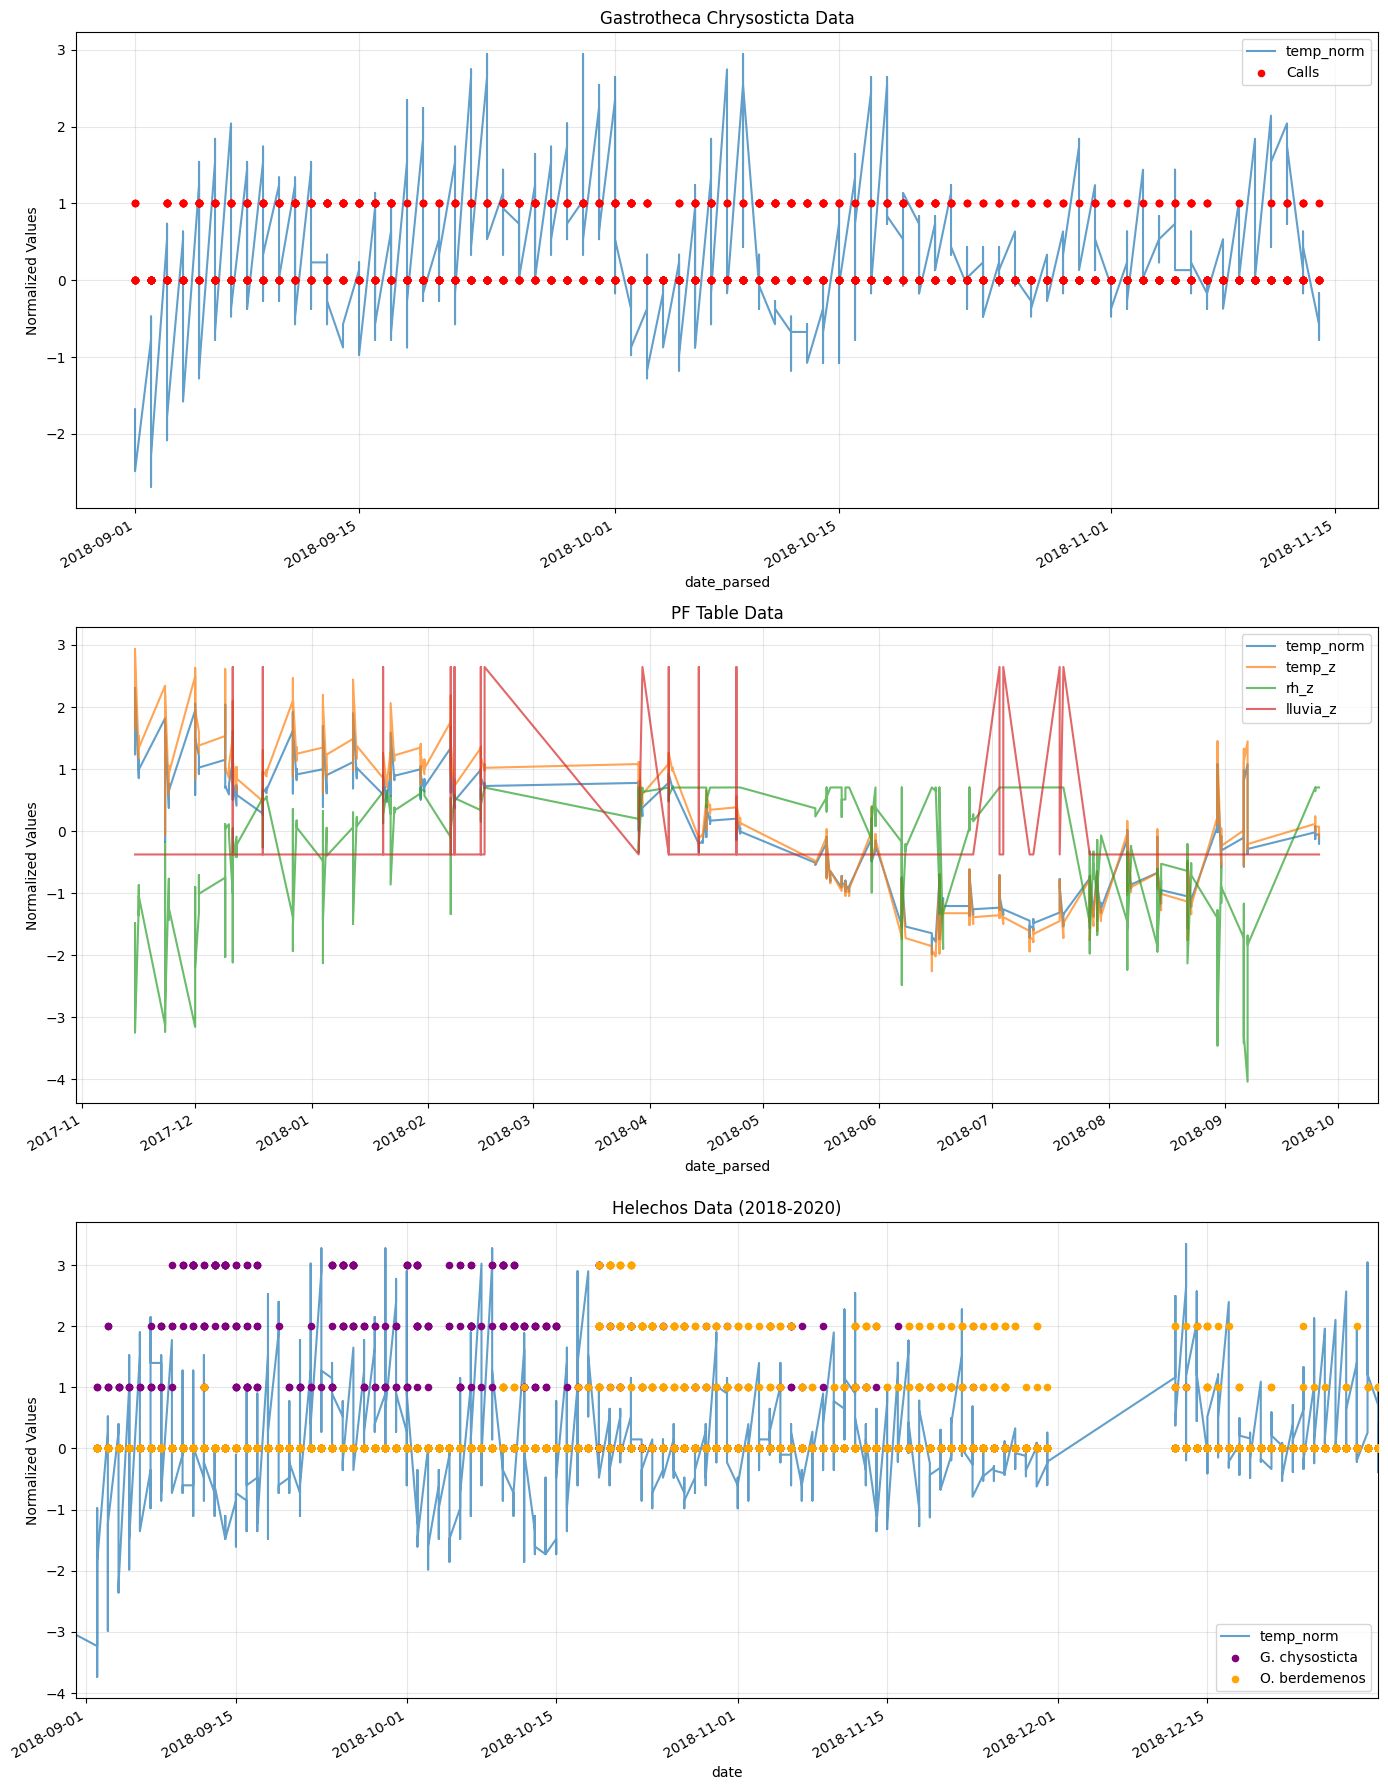

In [113]:
# Create a figure with subplots for each dataframe
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Plot 1: df_gastros_csv
gastros_data = std_gastros_csv.copy()
# Convert date string to datetime if it's not already
if 'date_parsed' in gastros_data.columns and gastros_data['date_parsed'].notna().any():
    date_col = 'date_parsed'
else:
    # Try to parse the date column if needed
    try:
        gastros_data['date_parsed'] = pd.to_datetime(gastros_data['date'], format='%m.%d.%y', errors='coerce')
        date_col = 'date_parsed'
    except:
        date_col = 'day'  # Fall back to day column if date parsing fails

gastros_data = gastros_data.sort_values(by=date_col)
gastros_data.plot(x=date_col, y=['temp_norm'], ax=axes[0], alpha=0.7)
# Add calls as scatter plot
calls_only = gastros_data[gastros_data['call'] == 1]
if not calls_only.empty:
    axes[0].scatter(gastros_data[date_col], gastros_data['call'], 
                   color='red', label='Calls', s=20, zorder=5)
axes[0].set_title('Gastrotheca Chrysosticta Data')
axes[0].set_ylabel('Normalized Values')
axes[0].legend()
axes[0].grid(True, alpha=0.3)


# Plot 2: PF_table
pf_data = std_PF_table.copy()
if 'date_parsed' in pf_data.columns:
    date_col = 'date_parsed'
else:
    # Try to parse the fecha column
    pf_data['date_parsed'] = pd.to_datetime(pf_data['fecha'], errors='coerce')
    date_col = 'date_parsed'

pf_data = pf_data.sort_values(by=date_col)
# Plot multiple environmental variables
pf_data.plot(x=date_col, y=['temp_norm', 'temp_z', 'rh_z', 'lluvia_z'], 
            ax=axes[1], alpha=0.7)
axes[1].set_title('PF Table Data')
axes[1].set_ylabel('Normalized Values')
axes[1].legend()
axes[1].grid(True, alpha=0.3)


# Plot 3: Helechos data
hel_data = std_helechos_2018_2020.copy()
if 'date' in hel_data.columns:
    # Make sure date is datetime
    if not pd.api.types.is_datetime64_any_dtype(hel_data['date']):
        hel_data['date'] = pd.to_datetime(hel_data['date'], errors='coerce')
    date_col = 'date'
else:
    date_col = 'day'  # Fall back to day if no date

hel_data = hel_data.sort_values(by=date_col)
hel_data.plot(x=date_col, y=['temp_norm'], ax=axes[2], alpha=0.7)
# Add gastrotheca chysosticta as scatter plot if there are positive values
if 'gastrotheca chysosticta' in hel_data.columns:
    species_data = hel_data[hel_data['gastrotheca chysosticta'] > 0]
    if not species_data.empty:
        axes[2].scatter(hel_data[date_col], hel_data['gastrotheca chysosticta'], 
                       color='purple', label='G. chysosticta', s=20, zorder=5)
        
if 'oreobates berdemenos' in hel_data.columns:
    species_data = hel_data[hel_data['oreobates berdemenos'] > 0]
    if not species_data.empty:
        axes[2].scatter(hel_data[date_col], hel_data['oreobates berdemenos'], 
                       color='orange', label='O. berdemenos', s=20, zorder=5)
        
# Limit to last 6 months for better visualization
date_max = hel_data[date_col].max()
date_min = date_max - pd.DateOffset(months=4)
plt.xlim(date_min, date_max)
axes[2].set_title('Helechos Data (2018-2020)')
axes[2].set_ylabel('Normalized Values')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

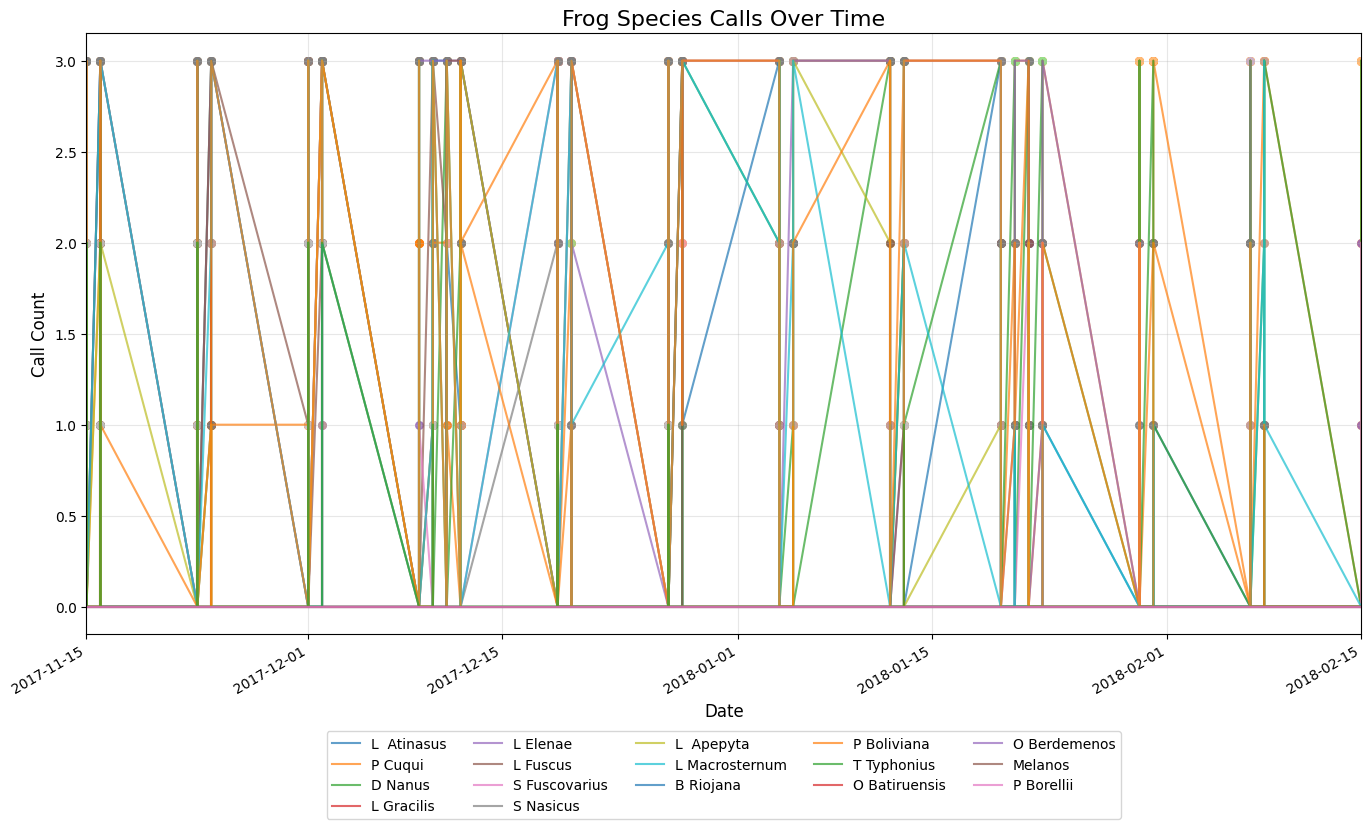

In [106]:
# Get the species columns (last 17 columns before date_parsed and temp_norm)
species_cols = std_PF_table.columns[-20:-2]

# Create a figure with a single plot
plt.figure(figsize=(14, 8))

# Sort the data by date
data_to_plot = std_PF_table.sort_values('date_parsed')

# Plot each species as a line
for species in species_cols:
    # Skip non-animal columns
    if species in ['s', 'a.r']:
        continue
    
    # Clean the species name for better display in legend
    species_name = species.replace('.', ' ').title()
    
    # Plot the data
    plt.plot(data_to_plot['date_parsed'], data_to_plot[species], 
             label=species_name, alpha=0.7, linewidth=1.5)\
             
    
    # Add markers for values > 0 to highlight occurrences
    nonzero = data_to_plot[data_to_plot[species] > 0]
    if not nonzero.empty:
        plt.scatter(nonzero['date_parsed'], nonzero[species], 
                   color=colors[list(species_cols).index(species)], 
                   s=30, marker='o', alpha=0.8)
    
    # Limit to first 5 months for better visualization
    date_min = data_to_plot['date_parsed'].min()
    date_max = date_min + pd.DateOffset(months=3)
    plt.xlim(date_min, date_max)

# Formatting
plt.title('Frog Species Calls Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Call Count', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)
plt.tight_layout()

# Format date axis
plt.gcf().autofmt_xdate()

plt.show()